<a href="https://colab.research.google.com/github/samrat19/UDACITY_TENSORFLOW_COURSE/blob/master/TensorFlow_Course.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# UDACITY TENSORFLOW COURSE

## Import Dependencies

we are importing tensorflow for showing errors and import numpy for showing our data in highly performant list

In [0]:
import tensorflow as tf

tf.logging.set_verbosity(tf.logging.ERROR)

import numpy as np

## Set up trainning data

In [29]:
celcius_q = np.array([-40, -10, 0, 8, 15, 22, 38], dtype=float)
farenhite_a = np.array([-40, 14,32, 46, 59, 72, 100], dtype=float)

for i,c in enumerate(celcius_q):
  print("{} degrees celcius = {} degree farenhite".format(c,farenhite_a[i]))

-40.0 degrees celcius = -40.0 degree farenhite
-10.0 degrees celcius = 14.0 degree farenhite
0.0 degrees celcius = 32.0 degree farenhite
8.0 degrees celcius = 46.0 degree farenhite
15.0 degrees celcius = 59.0 degree farenhite
22.0 degrees celcius = 72.0 degree farenhite
38.0 degrees celcius = 100.0 degree farenhite


## Some Machine learing terminology


*   **Feature:**  - The input to our model
*   **Lable** - Output of our Model which the model predicts
*   **Example** -- pair of input and output used during traing

## Create the Model

**next create the Model, we will use simplest possible model we can, a Dense Network. Since the problem is straight forward, this network will require only a single layer, with a single neuron**

## Build the layer

**we will call the layer 'layer0' and create it by installing tf.keras.layers.Dense with the following configuration: **

* **input_shape = [1] ==>  This specifies that the input to this layer is a single value. that is the shape is a one dimensional array with one  number. Since this is the first and only layer, that input shape is the input shape of the entire model. The single value is a floating point number, representing degree celcius** 

* **units=1 - This specifies the number of the neuron of the layer. The number of neurons defines how many internal variables the layer has to try to learn how to solve the problem (more later). Since this is the final layer, it is also the size of the model's output- a single float value representing degrees Farenhite (in a multilayer network , the size and shape of the later would need to match the input_shape of the next layer) ** 




In [0]:
layer0 = tf.keras.layers.Dense(units = 1, input_shape=[1])

# Assemble layers into the Model

**Once layers are defined, they need to be assembled into a model. The sequential model definition takes a list of layers as argument, specifying the calculation order from the input to the output**

**The model has just a single layer   layer0**

In [0]:
model = tf.keras.Sequential([layer0])

In [0]:
model.compile(loss = 'mean_squared_error', 
              optimizer = tf.keras.optimizers.Adam(0.1))

In [0]:
history = model.fit(celcius_q,farenhite_a,epochs = 500, verbose = False)

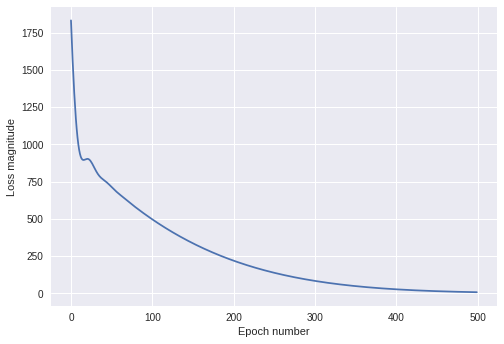

In [36]:
import matplotlib.pyplot as plt

plt.xlabel('Epoch number')
plt.ylabel("Loss magnitude")

plt.plot(history.history['loss'])

In [37]:
print(model.predict([100]))

[[211.33412]]
